<a href="https://colab.research.google.com/github/kelseymour/FastAI_cats/blob/main/cat_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 33.2 MB/s 
     |████████████████████████████████| 186 kB 46.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 293 kB/s 
Mounted at /content/gdrive


In [2]:
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         query_string = f'{o} bear'
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         downloader.download(query_string, limit=100,  output_dir=dest, adult_filter_off=True, force_replace=False, timeout=60)
#         #results = search_images_bing(key, f'{o} bear')
        #download_images(dest, urls=results.attrgot('contentUrl'))

#!pip install -q jmd_imagescraper

from pathlib import Path
root = Path().cwd()/"cats"

from jmd_imagescraper.core import *
duckduckgo_search(root, "tuxedo", "tuxedo cats", max_results=50)
duckduckgo_search(root, "persian", "persian cats", max_results=50)
duckduckgo_search(root, "siamese", "siamese cats", max_results=50)
duckduckgo_search(root, "sphynx", "sphynx cats", max_results=50)
duckduckgo_search(root, "bengal", "bengal cats", max_results=50)
duckduckgo_search(root, "munchkin", "munchkin cats", max_results=50)
duckduckgo_search(root, "ragdoll", "ragdoll cats", max_results=50)
duckduckgo_search(root, "exotic_shorthair", "exotic_shorthair cats", max_results=50)
duckduckgo_search(root, "british_shorthair", "british_shorthair cats", max_results=50)
duckduckgo_search(root, "maine_coon", "maine_coon cats", max_results=50)

Duckduckgo search: tuxedo cats


Duckduckgo search: persian cats


Duckduckgo search: siamese cats


Duckduckgo search: sphynx cats


Duckduckgo search: bengal cats


Duckduckgo search: munchkin cats


Duckduckgo search: ragdoll cats


Duckduckgo search: exotic_shorthair cats


Duckduckgo search: british_shorthair cats


Duckduckgo search: maine_coon cats


[Path('/content/cats/maine_coon/001_babfb139.jpg'),
 Path('/content/cats/maine_coon/002_6f69f398.jpg'),
 Path('/content/cats/maine_coon/003_08aaa8e8.jpg'),
 Path('/content/cats/maine_coon/004_02d87189.jpg'),
 Path('/content/cats/maine_coon/005_5acf1104.jpg'),
 Path('/content/cats/maine_coon/006_685b0c36.jpg'),
 Path('/content/cats/maine_coon/007_b9ea0483.jpg'),
 Path('/content/cats/maine_coon/008_0590334a.jpg'),
 Path('/content/cats/maine_coon/009_53375bfd.jpg'),
 Path('/content/cats/maine_coon/010_8554ced2.jpg'),
 Path('/content/cats/maine_coon/011_742c2f63.jpg'),
 Path('/content/cats/maine_coon/012_af746cb6.jpg'),
 Path('/content/cats/maine_coon/013_88ed68e8.jpg'),
 Path('/content/cats/maine_coon/014_687766ef.jpg'),
 Path('/content/cats/maine_coon/015_aec76ad7.jpg'),
 Path('/content/cats/maine_coon/016_466f7dde.jpg'),
 Path('/content/cats/maine_coon/017_b9d84948.jpg'),
 Path('/content/cats/maine_coon/018_037e4ed5.jpg'),
 Path('/content/cats/maine_coon/019_5ac37352.jpg'),
 Path('/cont

In [3]:
path = Path().cwd()/"cats"
fns = get_image_files(path)
fns

(#500) [Path('/content/cats/british_shorthair/032_3c595db4.jpg'),Path('/content/cats/british_shorthair/027_9053b6f8.jpg'),Path('/content/cats/british_shorthair/022_c0652480.jpg'),Path('/content/cats/british_shorthair/034_ad0933ac.jpg'),Path('/content/cats/british_shorthair/018_ea23f2e9.jpg'),Path('/content/cats/british_shorthair/015_f9a9eb35.jpg'),Path('/content/cats/british_shorthair/049_a2d476da.jpg'),Path('/content/cats/british_shorthair/038_4369f2ba.jpg'),Path('/content/cats/british_shorthair/001_9b252727.jpg'),Path('/content/cats/british_shorthair/046_646d0860.jpg')...]

In [4]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
#failed.map(Path.unlink);

In [6]:

cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = cats.dataloaders(path)

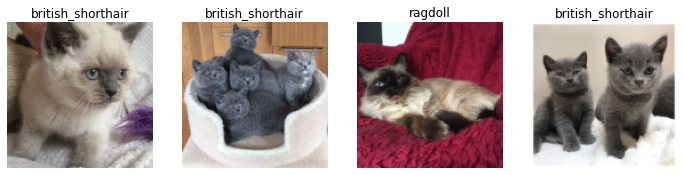

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

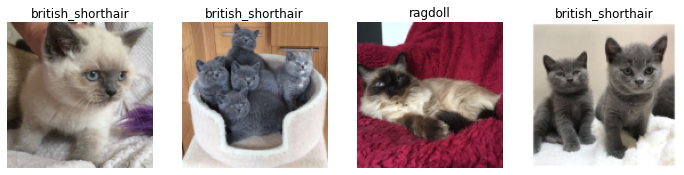

In [9]:
cats = cats.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cats.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

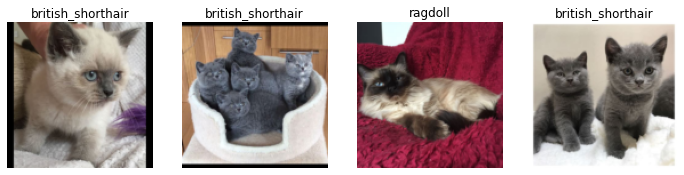

In [10]:
cats = cats.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cats.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

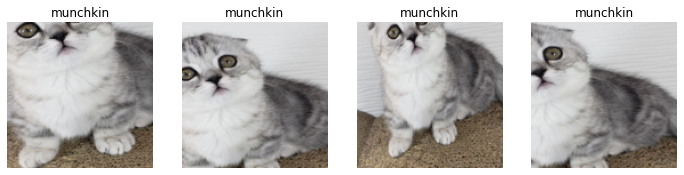

In [11]:

cats = cats.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = cats.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


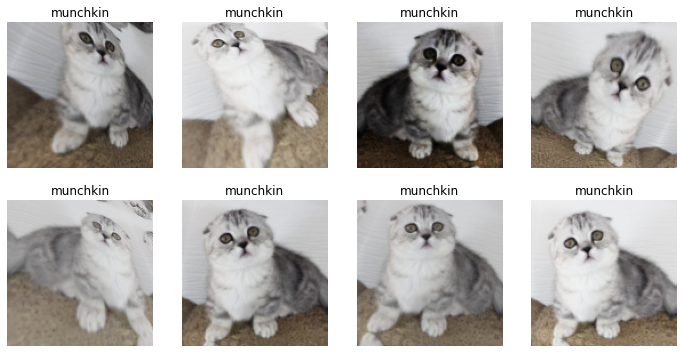

In [12]:
cats = cats.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cats.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [13]:
#the real training data
cats = cats.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cats.dataloaders(path)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,3.381367,2.126633,0.670000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.549036,1.106433,0.330000,00:06
1,1.359022,0.780909,0.200000,00:06
2,1.114226,0.802683,0.210000,00:06
3,0.954581,0.784821,0.210000,00:06


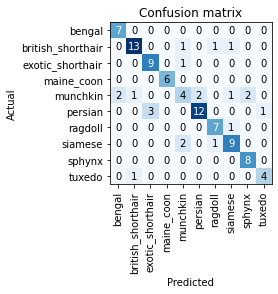

In [15]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

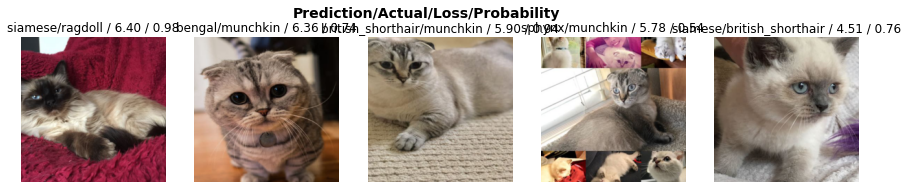

In [16]:

interp.plot_top_losses(5, nrows=1)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:

# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [17]:
learn.export()

In [19]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('test_images/IMG_4281_copy.JPG')

('tuxedo',
 tensor(9),
 tensor([3.2350e-05, 6.8664e-05, 5.8389e-07, 3.0658e-05, 6.1947e-06, 6.4885e-06, 6.5618e-07, 3.3262e-06, 1.7299e-04, 9.9968e-01]))

In [21]:
learn_inf.dls.vocab

['bengal', 'british_shorthair', 'exotic_shorthair', 'maine_coon', 'munchkin', 'persian', 'ragdoll', 'siamese', 'sphynx', 'tuxedo']

In [25]:
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila

In [23]:

#input
btn_upload = widgets.FileUpload()
btn_upload = SimpleNamespace(data = ['test_images/IMG_4281_copy.JPG'])
img = PILImage.create(btn_upload.data[-1])
#starting preds
pred,pred_idx,probs = learn_inf.predict(img)

#output image
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))

#output label
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

#run button
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

btn_upload = widgets.FileUpload()

In [24]:
VBox([widgets.Label('Select your cat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])